<p>
<img src='utils/diagrams/eda.png' style='width:900px;height:500px'>
</p>

This Project ***Credit Card Fraud Detection*** is a binary classification project detect  
if the transaction is fraud or normal transaction  
  
  
- This project inspired by [Kaggle competition](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code?datasetId=310&sortBy=voteCount&searchQuery=tsne)   
- the data are higly unbalanced with positive class (fraud transaction) 0.172%
- Most of the data are anonymous `V1` to `V28`  
- what clear is `Amount` & `Time`

This Notebook like EDA for the Data   

[(1) Understand the Dataset](#1-understand-the-dataset) 

[(2) Data Cleaning](#2-data-cleaning)  

[(3) Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)

## (1) Understand the Dataset

import required libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('data/split/trainval.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,70320.0,-1.440536,-0.157661,1.951210,3.375675,1.076378,-1.049474,0.043954,0.063408,-1.379699,...,0.163049,0.035337,0.071452,0.710874,0.425002,0.353786,-0.007267,0.108108,62.38,0
1,36855.0,-0.268054,-0.026194,1.862894,-1.989876,-0.551961,-0.310759,0.277641,-0.160598,1.790869,...,0.201588,1.162627,-0.333368,0.171281,0.136557,-0.488836,0.063452,-0.095439,25.95,0
2,42436.0,-3.873686,2.279104,0.434901,-3.173945,-0.504830,0.029066,0.757593,-1.322265,2.122661,...,-0.771537,-1.354687,0.149311,-0.385015,-0.752701,0.449522,-3.542555,-1.439570,17.00,0
3,163977.0,-0.368752,0.922792,1.353228,2.461567,1.451856,2.942073,-0.074470,0.868245,-1.287337,...,0.445099,1.458492,-0.033405,-1.841053,-0.690577,0.123031,0.028285,0.027508,0.00,0
4,130811.0,2.258621,-1.431942,-0.567731,-1.431582,-1.627116,-0.924648,-1.228725,-0.224030,-1.030023,...,-0.137722,0.117330,0.253277,0.026271,-0.289235,-0.179701,0.024791,-0.042692,25.00,0


In [6]:
df.shape

(56960, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56960 entries, 0 to 56959
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56960 non-null  float64
 1   V1      56960 non-null  float64
 2   V2      56960 non-null  float64
 3   V3      56960 non-null  float64
 4   V4      56960 non-null  float64
 5   V5      56960 non-null  float64
 6   V6      56960 non-null  float64
 7   V7      56960 non-null  float64
 8   V8      56960 non-null  float64
 9   V9      56960 non-null  float64
 10  V10     56960 non-null  float64
 11  V11     56960 non-null  float64
 12  V12     56960 non-null  float64
 13  V13     56960 non-null  float64
 14  V14     56960 non-null  float64
 15  V15     56960 non-null  float64
 16  V16     56960 non-null  float64
 17  V17     56960 non-null  float64
 18  V18     56960 non-null  float64
 19  V19     56960 non-null  float64
 20  V20     56960 non-null  float64
 21  V21     56960 non-null  float64
 22

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,...,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000
mean,94618.777633,0.008241,0.009452,0.004196,-0.001807,0.003572,-0.004865,-0.007557,0.001075,0.003971,...,-0.001866,0.001418,-0.004535,0.003388,0.002069,0.000141,0.000973,-0.002645,86.702456,0.001580
std,47567.353857,1.928594,1.610555,1.493492,1.414919,1.350720,1.325396,1.183066,1.205519,1.094351,...,0.728364,0.726550,0.626531,0.606313,0.518774,0.482796,0.389882,0.306264,232.028111,0.039719
min,4.000000,-35.274010,-44.639245,-31.813586,-5.416315,-29.730600,-21.248752,-31.197329,-50.943369,-9.462573,...,-22.665685,-8.887017,-44.807735,-2.822684,-10.295397,-2.241620,-8.260909,-8.656570,0.000000,0.000000
25%,53925.250000,-0.916434,-0.600371,-0.887902,-0.856074,-0.688001,-0.773573,-0.557624,-0.208778,-0.639260,...,-0.228330,-0.541710,-0.162602,-0.352806,-0.315141,-0.327057,-0.071073,-0.053091,5.550000,0.000000
50%,84559.000000,0.026847,0.069277,0.184420,-0.030007,-0.053001,-0.283597,0.037480,0.023736,-0.050270,...,-0.028119,0.009966,-0.013068,0.042979,0.017146,-0.055370,0.000981,0.011129,21.875000,0.000000
75%,139385.250000,1.318466,0.811323,1.024113,0.747237,0.614933,0.390776,0.568802,0.331706,0.602992,...,0.187589,0.531348,0.146956,0.445147,0.352085,0.240541,0.089555,0.077585,76.000000,0.000000
max,172788.000000,2.418802,17.418649,4.101716,12.699542,31.457046,21.307738,31.527244,20.007208,10.370658,...,27.202839,7.220158,18.364472,3.951679,5.473885,2.991210,10.507884,15.866721,11789.840000,1.000000


In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
df[df.duplicated()].shape

(62, 31)

In [11]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1232,123071.0,1.847235,0.339967,-1.522324,3.423434,1.429797,1.497229,0.096091,0.412087,-1.069708,...,0.328189,1.051528,-0.047523,-1.664775,0.201577,0.413007,-0.029553,-0.096775,0.00,0
3842,144050.0,1.787763,-0.737892,-0.185794,0.362758,-0.550775,0.676564,-0.932369,0.390445,1.349983,...,0.331025,1.223539,0.264791,-0.541170,-0.571339,0.812785,0.017984,-0.054691,29.95,0
4933,149337.0,-1.539350,1.938019,-1.289569,-0.747991,-0.272802,-0.894771,-0.077204,1.211135,0.036662,...,-0.143919,-0.492349,0.169274,-0.676020,-0.629355,0.216458,0.223380,0.195479,1.84,0
5149,128860.0,-9.070453,4.540622,-5.682499,-0.373536,-5.073193,0.835235,-5.509670,7.060012,-0.970000,...,1.032079,0.828836,0.223580,-1.354267,-0.023923,0.607398,-2.838626,-0.903418,4.08,0
5509,128860.0,-9.070453,4.540622,-5.682499,-0.373536,-5.073193,0.835235,-5.509670,7.060012,-0.970000,...,1.032079,0.828836,0.223580,-1.354267,-0.023923,0.607398,-2.838626,-0.903418,4.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55343,31804.0,-1.783888,1.245670,2.097173,1.031059,-0.793755,0.566460,-0.403512,0.625924,0.627739,...,-0.054154,-0.029875,-0.094100,0.056197,0.116731,-0.403204,-1.117816,-0.466715,1.00,0
55600,161003.0,2.154480,0.501878,-2.532683,1.134530,1.259259,-1.249410,1.161719,-0.658065,-0.366966,...,0.266285,1.026376,-0.317967,-0.580492,1.002524,-0.157059,-0.048674,-0.084253,1.00,0
55800,72639.0,-1.885984,1.544625,0.892467,0.108131,-1.479409,0.176344,-1.235871,1.434311,0.015997,...,0.225313,0.097921,0.039288,0.012774,-0.181800,0.219053,-1.031994,-0.168159,4.66,0
56764,166816.0,-1.070922,1.588169,-0.651751,-0.808078,0.231805,-0.501000,0.295713,0.833820,-0.600594,...,-0.049331,-0.145815,0.174245,0.790853,-0.723718,0.104490,0.247502,0.201449,3.47,0


In [12]:
columns = df.columns

outlier_features = []

for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3-q1

    lower_pound = q1-1.5*iqr
    upper_pound = q3+1.5*iqr
    mask = df[(df[col]<lower_pound) | (df[col]>upper_pound)]
    if not mask.empty:
        outlier_features.append([col, mask.shape[0]])
print(outlier_features)

[['V1', 1393], ['V2', 2621], ['V3', 627], ['V4', 2168], ['V5', 2399], ['V6', 4672], ['V7', 1749], ['V8', 4731], ['V9', 1601], ['V10', 1827], ['V11', 153], ['V12', 3132], ['V13', 682], ['V14', 2875], ['V15', 606], ['V16', 1595], ['V17', 1483], ['V18', 1511], ['V19', 2006], ['V20', 5540], ['V21', 2812], ['V22', 276], ['V23', 3617], ['V24', 958], ['V25', 1060], ['V26', 1114], ['V27', 7982], ['V28', 6107], ['Amount', 6425], ['Class', 90]]


- the data has 56960 Example and 31 Feature
- the data is clean, there is no missing or Nan 
- there is 62 duplicate example 

- `Time` Feature show the secends between the first transaction and each transaction
- from `V1` to `V28` it's alredy scaled 
- `Amount` show the amount of transactions happen in this time

- The data contain outlier examples

## (2) Data Cleaning

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3-q1

    lower_pound = q1-1.5*iqr
    upper_pound = q3+1.5*iqr
    df[col] = np.where(df[col]<lower_pound, lower_pound,np.where(df[col]>upper_pound, upper_pound, df[col]))


## (3) Exploratory Data Analysis (EDA)

In [15]:
def primary_col_info(col:pd.DataFrame):
    print(f'Value Counts {col.value_counts()}')
    print(f'Minimum {col.min()}, Maximum {col.max()}')
    print(f'Skewness {col.skew()}')

In [16]:
from sklearn.manifold import TSNE

def visualize(x,y):
    tsne = TSNE(n_components=2)
    x_embeded = tsne.fit_transform(x)
    plt.scatter(x_embeded[:,0], x_embeded[:,1],c=y)
    plt.colorbar()
    plt.show()

### Target Feature

In [17]:
primary_col_info(df['Class'])

Value Counts Class
0    56809
1       89
Name: count, dtype: int64
Minimum 0, Maximum 1
Skewness 25.225750509789208


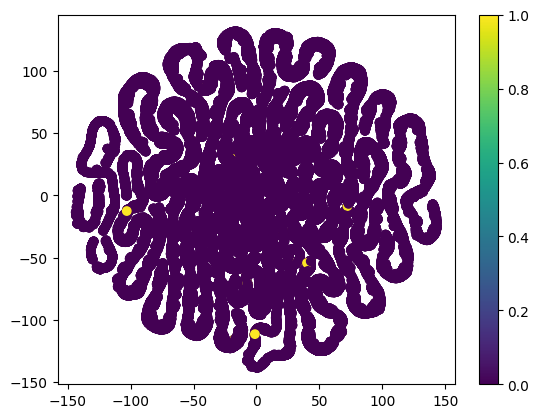

In [19]:
visualize(df.iloc[:,:-1],df['Class'])

In [15]:
threshold_one = df[df['Class']==1].shape[0]/df[df['Class']==0].shape[0]
threshold_one

0.0015666531711524582

the data is higly piased across normal transaction   
only 0.00157 are fraud transaction

###  `Vs` Features

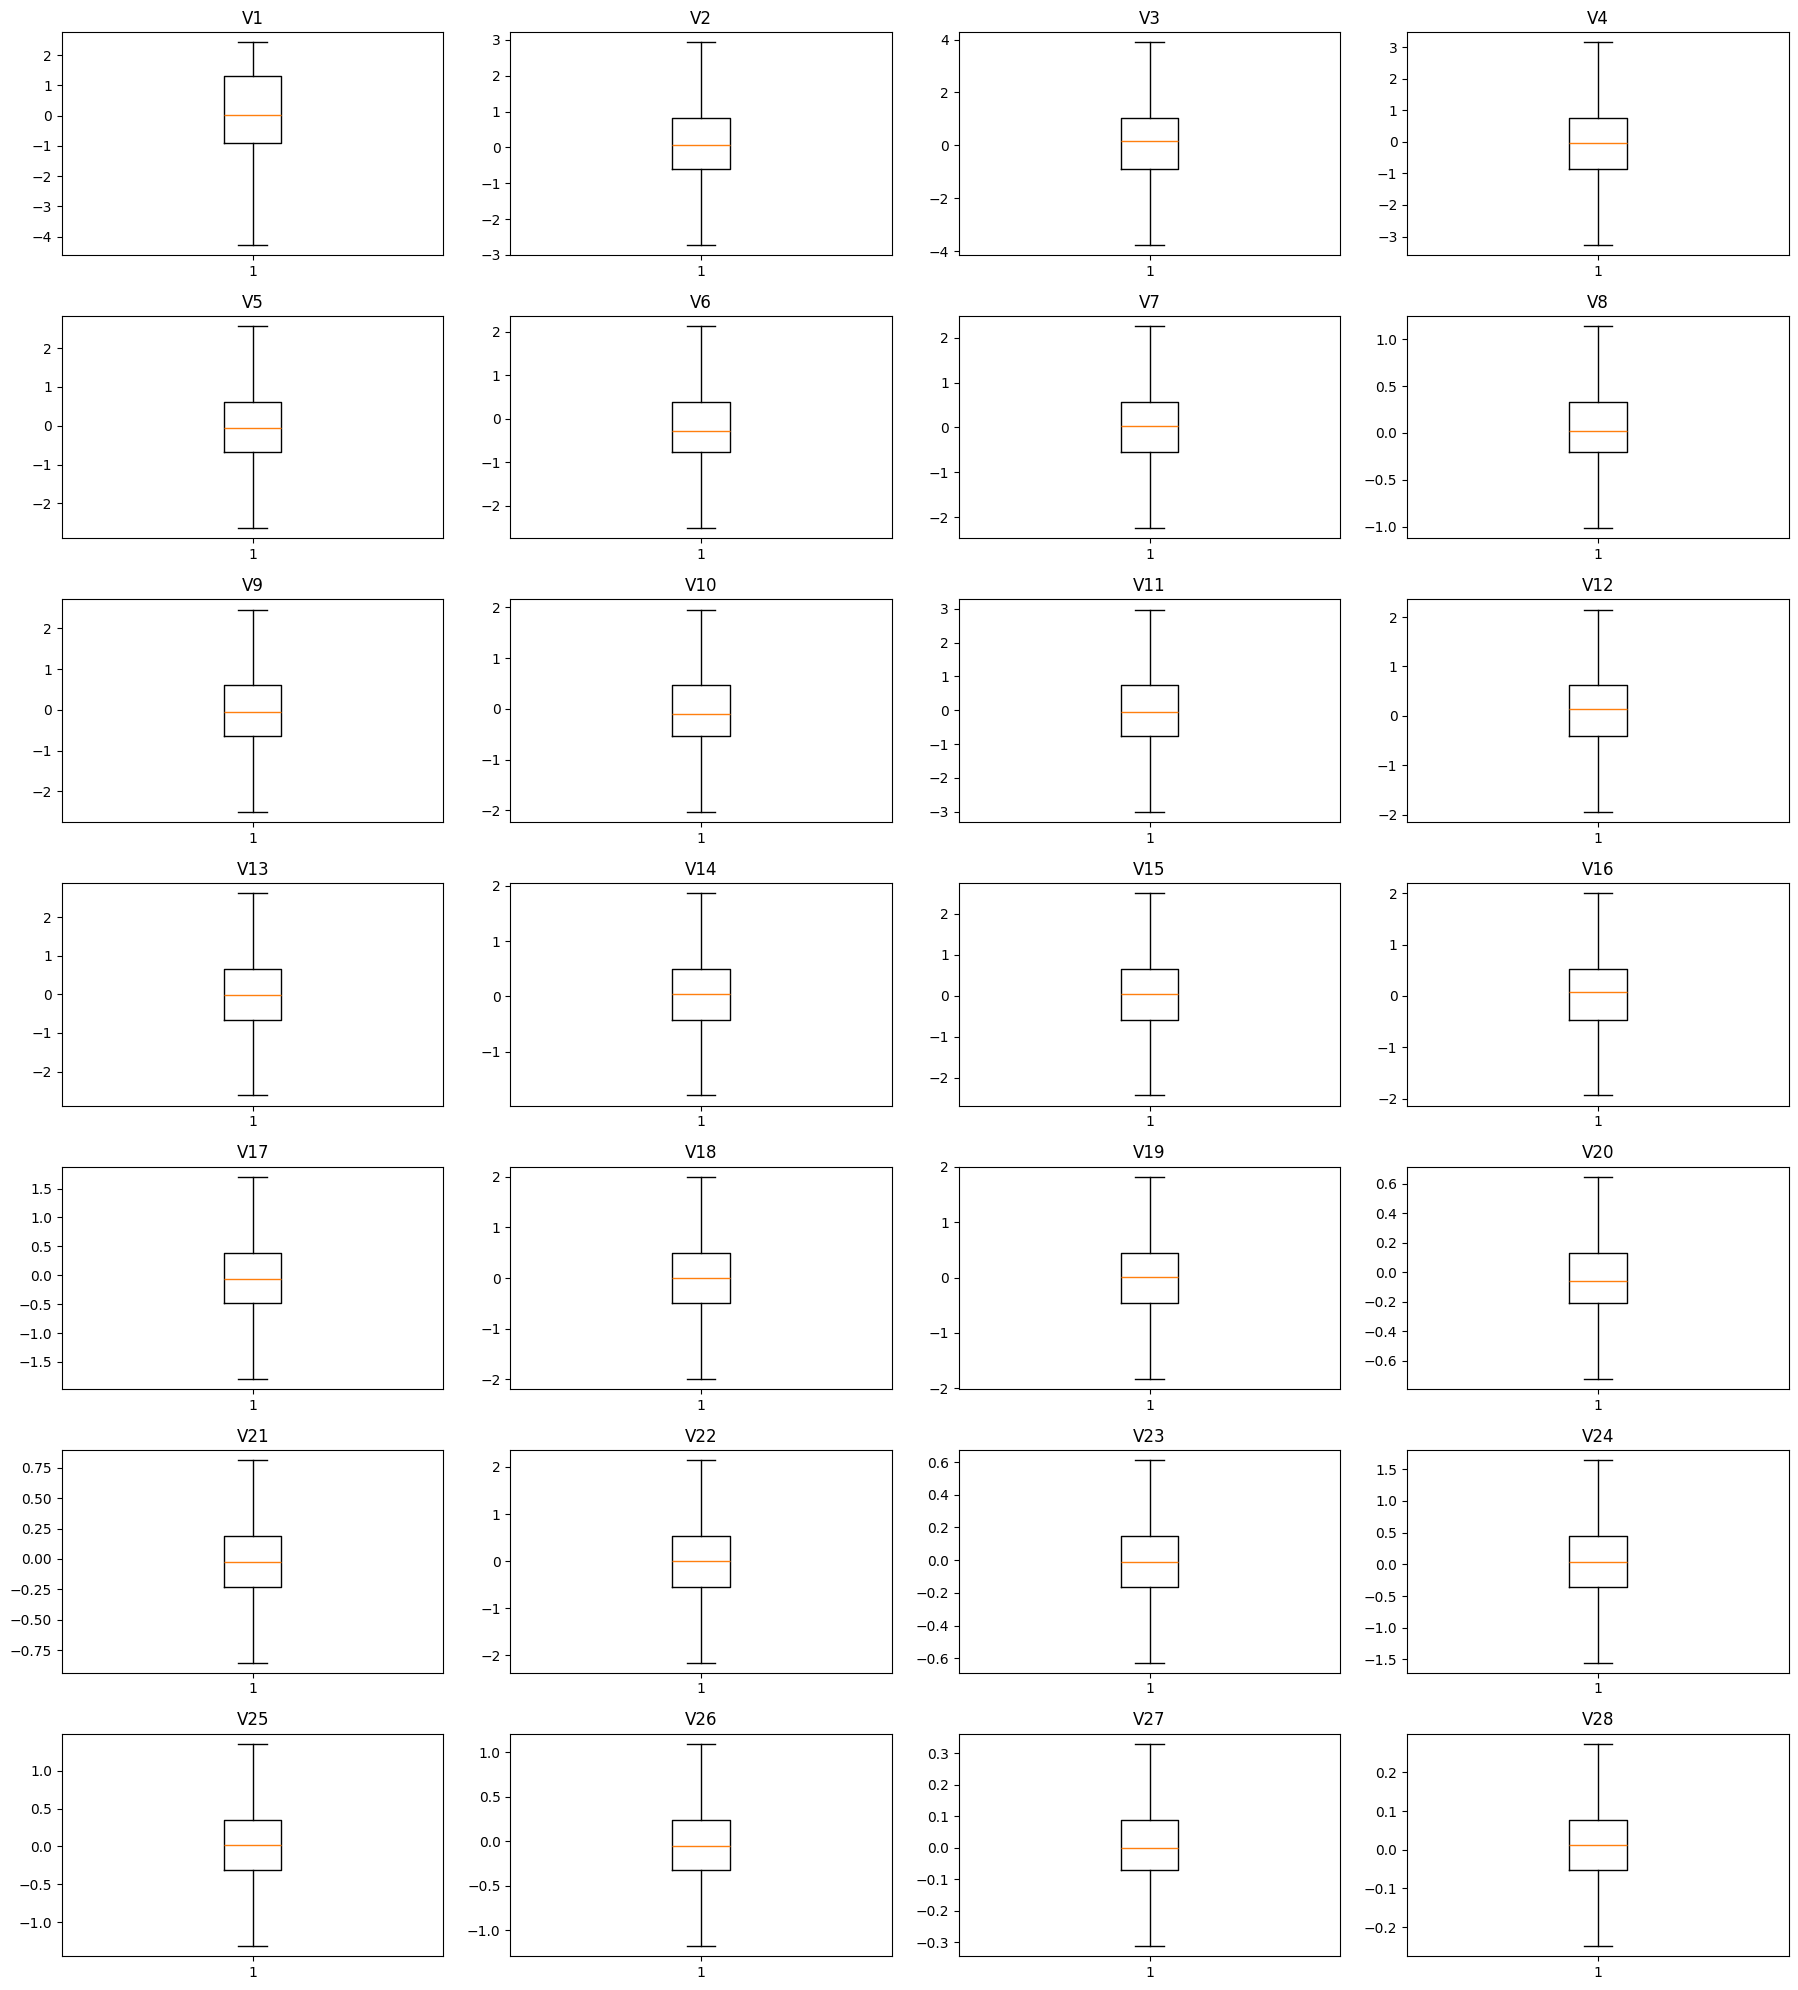

In [16]:
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(18,20))
for i in range(28):
    plt.subplot(7,4, i+1)
    plt.boxplot(df[columns[i]])
    plt.title(f'{columns[i]}')
    
plt.tight_layout()
plt.show()

In [17]:
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

for col in columns:
    print(df[col].skew(), end=', ')

-0.6445660121953177, -0.1278104583203466, -0.4053197757211339, 0.1921431278288648, 0.23744573077491016, 0.6695731435371862, -0.07118413536879267, 0.1555029975164597, 0.10366352042432976, 0.23415172639260454, 0.1041897237691908, -0.5695946942842877, 0.0459867897071673, -0.08294807763549494, -0.2767314466992966, -0.22956950445896096, 0.4388867137715591, -0.0003501226425464362, -0.04404429558314431, 0.3021884551591031, 0.11449314824431855, -0.041240857729898536, 0.06109919950562899, -0.5535975987483275, -0.14976164371262138, 0.377448181803686, 0.08373763894571644, -0.04388987063685821, 

these columns from ***V1*** to ***V28*** are normalized  
they centerd around zero

### `Amount`

In [18]:
primary_col_info(df['Amount'])

Value Counts Amount
181.645    6421
1.000      2744
1.980      1211
0.890       995
9.990       949
           ... 
61.110        1
146.790       1
5.650         1
60.480        1
117.710       1
Name: count, Length: 8996, dtype: int64
Minimum 0.0, Maximum 181.645
Skewness 1.2079109013054252


In [35]:
cols = ['Amount','Class']

corr = df[cols].corr()
print(corr)

          Amount     Class
Amount  1.000000  0.010102
Class   0.010102  1.000000


the correlation between Amount and Class is very low there is no correlation between the amount of transactions and Fraud transactions

### Time

In [37]:
primary_col_info(df['Time'])

Value Counts Time
73885.0     6
3766.0      6
158688.0    6
19912.0     6
124966.0    5
           ..
149919.0    1
80297.0     1
54145.0     1
54502.0     1
65165.0     1
Name: count, Length: 46667, dtype: int64
Minimum 4.0, Maximum 172788.0
Skewness -0.03215168710526755


In [20]:
max_num_hours = df['Time'].max()/60/60
max_num_hours

np.float64(47.99666666666667)

In [41]:
df['Hours'] = df['Time']/60/60

cols = ['Hours', 'Class']
corr = df[cols].corr()
print(corr)

          Hours     Class
Hours  1.000000 -0.008129
Class -0.008129  1.000000


also there is no correlation between time and fraud transactions

In [47]:
df.shape

(56898, 32)

In [45]:
df.drop(columns=['Time'], axis=1, inplace=True)

In [73]:
corr = df.corr()
target_corr = corr.iloc[:,-2].reset_index().sort_values(by='Class',ascending=False)
target_corr.head(10)


,index,Class
29,Class,1.000000
10,V11,0.088365
3,V4,0.077832
1,V2,0.060661
20,V21,0.047970
18,V19,0.031820
26,V27,0.029253
7,V8,0.026855
19,V20,0.019486
27,V28,0.015903


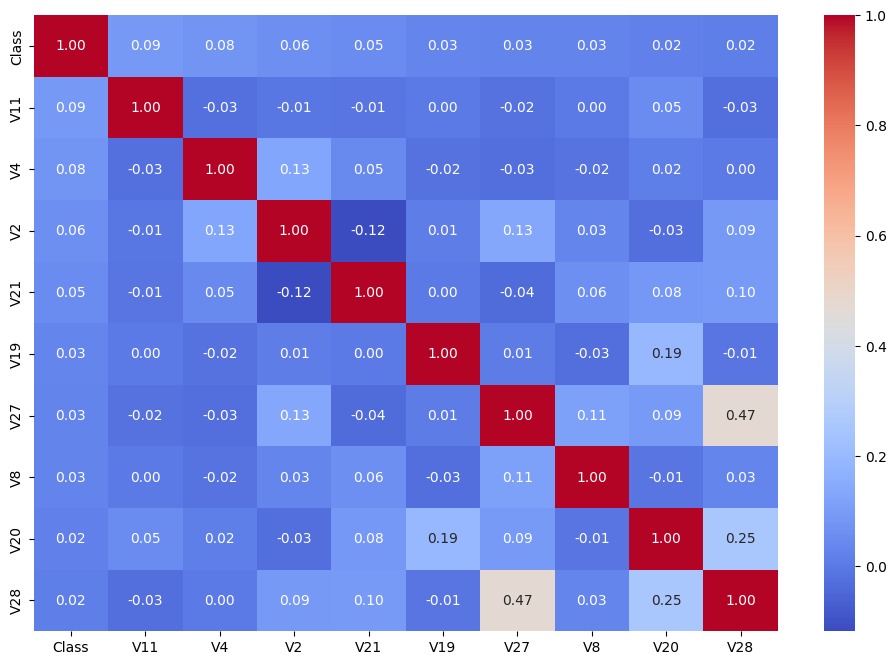

In [74]:
cols = ['Class','V11','V4','V2','V21','V19','V27','V8','V20','V28']
corr = df[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap= 'coolwarm', annot=True, fmt='.2f')

plt.show()

## Conclusion

- The Data is Highly implanced with only 0.00157% positive class
- All featrues (except target) are floats
- Most of the features are Annonymous and normalized, 28 features
- the data is very week (very low correlation)
- there is no missing data (Clean)

***SO***
- We can not use Accurecy as target metric
- We Will use F1-Score as our target metric - also we will try precision, recall, PR-AUC-
- We can do Undersampling majority class
- Oversampling minority class
- Undersampling majority + Oversampling minority
- Tree-based Algorithms